# Programmatic Modeling with Scikit-Learn

Next up: wrap the feature engineerinf and one-hot encoding of ctegorical variables into a generic function

# Set-Up

In [1]:
#Import your packges into memory so they can be used

import pandas as pd
import numpy as np
import requests
import json

from sklearn import metrics
from sklearn import cross_validation

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from io import StringIO

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/gpfs/fs01/user/s4dc-3c1d8d0922c794-b2a1d042c9cf/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Function Definitions

In [2]:
# This is an automatically-generated import of a file stored in DSX.
from io import StringIO
import requests
import json


# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_f587212a266f4c81817d24d6e15e19ed(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_04419ebcefd2e55c696cad4c401127a479919004','domain': {'id': 'f3b70920040d40c780059c739e41899e'},
            'password': 'OF,Xh=d5Mpnz2_9Q'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

In [3]:
#Evaluate a classification target, show the class frequencies and a bar chart of their occurence.
def evaluateTarget(et_dataset, et_target):
    print(et_dataset[et_target].value_counts())
    sns.countplot(x=et_target,data=et_dataset, palette='hls')
    plt.show()
    #plt.savefig('count_plot')

In [4]:
#def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
# alg = the classifier object
# dtrain = full dataset
# predictors = X_train dataframe
# target = y_train dataframe

def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [5]:
#Performs LabelBinarizer and OHE automatically
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
def prepData(fsdata):
    data_cat = fsdata.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)
    data_num = fsdata.select_dtypes(exclude=['object'])
    data_cat = pd.DataFrame(data = data_cat)
    data_cat_ohe = pd.get_dummies(data_cat, columns = data_cat.columns )
    fsdata = pd.merge(data_cat_ohe, data_num, right_index=True, left_index=True)
    return fsdata

## Data

Load your data here.

In [6]:
data = pd.read_csv(get_object_storage_file_with_credentials_f587212a266f4c81817d24d6e15e19ed('ClassificationExampleInPython', 'banking.csv'))
data.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu ...         1    999         0  nonexistent   
1  cellular   nov         fri ...         1    999         0  nonexistent   
2  cellular   jun         thu ...         3      6         2      success   
3  cellular   apr         fri ...         2    999         0  nonexistent   
4  cellular   aug         fri ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]

### Feature Selection

In [7]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], np.ravel(data_final[y]))
print(rfe.support_)
print(rfe.ranking_)

NameError: name 'data_final' is not defined

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [ ]:
predictors=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
target='y'
X=data_final[predictors]
y=data_final[target]

## Scratch Pad

In [9]:
#View the data
data.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu ...         1    999         0  nonexistent   
1  cellular   nov         fri ...         1    999         0  nonexistent   
2  cellular   jun         thu ...         3      6         2      success   
3  cellular   apr         fri ...         2    999         0  nonexistent   
4  cellular   aug         fri ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]

In [10]:
#Drop incomplete observations and look at the dimensions and field names.
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [11]:
# do OHE and label binarizer
data_final = prepData(data)
print(data_final.shape)

(41188, 64)


0    36548
1     4640
Name: y, dtype: int64


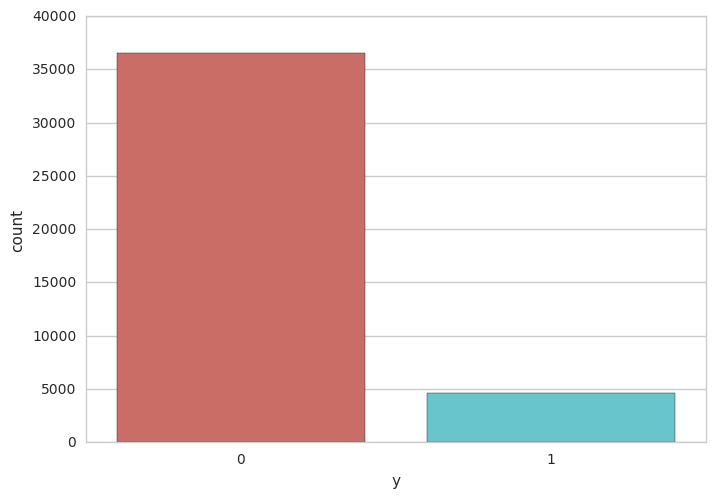

In [12]:
evaluateTarget(data_final,'y')

In [13]:
target_field = 'y'
target = data_final[target_field]

In [15]:
predictor_fields = data_final.drop(target_field, axis=1).columns

In [16]:
X=data_final[predictor_fields]
y=data_final[target_field]

In [17]:
data_final.head()

job_0  job_1  job_2  job_3  job_4  job_5  job_6  job_7  job_8  job_9 ...  \
0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0 ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0 ...   
2    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0 ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0 ...   
4    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0 ...   

   duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       210         1    999         0           1.4          93.444   
1       138         1    999         0          -0.1          93.200   
2       339         3      6         2          -1.7          94.055   
3       185         2    999         0          -1.8          93.075   
4       137         1      3         1          -2.9          92.201   

   cons_conf_idx  euribor3m  nr_employed  y  
0          -36.1      4.963       5228.1  0  
1          -42.0      4.021       5195.8  0  
2          -39.8      0.729       4991.6  1  
3          -47.1      1.405       5099.1  0  
4          -31.4      0.869       5076.2  1  

[5 rows x 64 columns]

In [18]:
#Build and evaluate a logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
modelfit(logreg,data_final,predictor_fields,target_field,performCV=True, printFeatureImportance=False)


Model Report
Accuracy : 0.9106
AUC Score (Train): 0.931101
CV Score : Mean - 0.9316844 | Std - 0.00146624 | Min - 0.929532 | Max - 0.9338253


In [ ]:
#Build and evaluate a gradient boosted classifer
from sklearn import ensemble
xgb = ensemble.GradientBoostingClassifier()
modelfit(xgb,data_final,predictor_fields,target_field,performCV=True,printFeatureImportance=True)

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#### Accuracy

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curve

In [1]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'y_test' is not defined

## Implement XGBoost with Hyperparameter Tuning using a Grid Search

So this is great, but since this whole thing is about mashing together programming and modeling, what are we missing? How can we use the power of programtic instructions to make our end result better? What if used Python to train a whole bunch of models with different settings?

That's where the idea of a GridSearch comes in. The sklearn ensemble.GridSearchCV object is an interator - pass in a classifier model type and a dictionary of parameters, and it returns a fitted (trained) classifier model just like above. Let's look.

In [19]:
#Import the class we need
from sklearn.model_selection import GridSearchCV

In [20]:
#Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
from sklearn import ensemble

In [23]:
#Define the parameters to iterate over
param = {
 'n_estimators':[50,100,500,1200],
 'max_depth':[2,3,9,12,15]
}

#Create the GridSearchCV object
gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(), param_grid = param, cv=10, verbose = 2)

#Train the classifier using the GridSearchCV object. You fit it just like the plain old classifier above.
gsearch1.fit(X_test, y_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] n_estimators=50, max_depth=2 ....................................
[CV] ..................... n_estimators=50, max_depth=2, total=   0.6s
[CV] n_estimators=50, max_depth=2 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ..................... n_estimators=50, max_depth=2, total=   0.6s
[CV] n_estimators=50, max_depth=2 ....................................
[CV] ..................... n_estimators=50, max_depth=2, total=   0.6s
[CV] n_estimators=50, max_depth=2 ....................................
[CV] ..................... n_estimators=50, max_depth=2, total=   0.6s
[CV] n_estimators=50, max_depth=2 ....................................
[CV] ..................... n_estimators=50, max_depth=2, total=   0.6s
[CV] n_estimators=50, max_depth=2 ....................................
[CV] ..................... n_estimators=50, max_depth=2, total=   0.7s
[CV] n_estimators=50, max_depth=2 ....................................
[CV] ..................... n_estimators=50, max_depth=2, total=   0.7s
[CV] n_estimators=50, max_depth=2 ....................................
[CV] ..................... n_estimators=50, max_depth=2, total=   0.6s
[CV] n_estimators=50, max_depth=2 ....................................
[CV] .

[CV] .................... n_estimators=100, max_depth=3, total=   2.0s
[CV] n_estimators=500, max_depth=3 ...................................
[CV] .................... n_estimators=500, max_depth=3, total=   9.4s
[CV] n_estimators=500, max_depth=3 ...................................
[CV] .................... n_estimators=500, max_depth=3, total=   9.7s
[CV] n_estimators=500, max_depth=3 ...................................
[CV] .................... n_estimators=500, max_depth=3, total=   9.9s
[CV] n_estimators=500, max_depth=3 ...................................
[CV] .................... n_estimators=500, max_depth=3, total=   9.6s
[CV] n_estimators=500, max_depth=3 ...................................
[CV] .................... n_estimators=500, max_depth=3, total=   9.7s
[CV] n_estimators=500, max_depth=3 ...................................
[CV] .................... n_estimators=500, max_depth=3, total=  10.7s
[CV] n_estimators=500, max_depth=3 ...................................
[CV] .

[CV] ................... n_estimators=1200, max_depth=9, total= 1.3min
[CV] n_estimators=1200, max_depth=9 ..................................
[CV] ................... n_estimators=1200, max_depth=9, total= 1.3min
[CV] n_estimators=1200, max_depth=9 ..................................
[CV] ................... n_estimators=1200, max_depth=9, total= 1.3min
[CV] n_estimators=50, max_depth=12 ...................................
[CV] .................... n_estimators=50, max_depth=12, total=  19.7s
[CV] n_estimators=50, max_depth=12 ...................................
[CV] .................... n_estimators=50, max_depth=12, total=  19.7s
[CV] n_estimators=50, max_depth=12 ...................................
[CV] .................... n_estimators=50, max_depth=12, total=  18.1s
[CV] n_estimators=50, max_depth=12 ...................................
[CV] .................... n_estimators=50, max_depth=12, total=  18.9s
[CV] n_estimators=50, max_depth=12 ...................................
[CV] .

[CV] ................... n_estimators=100, max_depth=15, total=  38.6s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ................... n_estimators=100, max_depth=15, total=  40.2s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ................... n_estimators=100, max_depth=15, total=  41.4s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ................... n_estimators=100, max_depth=15, total=  41.2s
[CV] n_estimators=100, max_depth=15 ..................................
[CV] ................... n_estimators=100, max_depth=15, total=  40.1s
[CV] n_estimators=500, max_depth=15 ..................................
[CV] ................... n_estimators=500, max_depth=15, total=  40.3s
[CV] n_estimators=500, max_depth=15 ..................................
[CV] ................... n_estimators=500, max_depth=15, total=  42.1s
[CV] n_estimators=500, max_depth=15 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 92.6min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 9, 12, 15], 'n_estimators': [50, 100, 500, 1200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [24]:
#And since the result is just a model, the evaluation process is identifical.
acc = gsearch1.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.9311


In [71]:
#And GridSearchCV stores its detailed results for you to review...
print(pd.DataFrame(gsearch1.cv_results_))

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.551696         0.001826         0.914947          0.919227   
1       1.075947         0.002511         0.916889          0.923678   
2       0.982766         0.002156         0.918508          0.926609   
3       1.884446         0.003103         0.918993          0.933101   

  param_max_depth param_n_estimators                                 params  \
0               2                 50   {'n_estimators': 50, 'max_depth': 2}   
1               2                100  {'n_estimators': 100, 'max_depth': 2}   
2               3                 50   {'n_estimators': 50, 'max_depth': 3}   
3               3                100  {'n_estimators': 100, 'max_depth': 3}   

   rank_test_score  split0_test_score  split0_train_score       ...         \
0                4           0.913500            0.920594       ...          
1                3           0.913500            0.923561       ...          
2        

/gpfs/fs01/user/s4dc-3c1d8d0922c794-b2a1d042c9cf/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/gpfs/fs01/user/s4dc-3c1d8d0922c794-b2a1d042c9cf/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/gpfs/fs01/user/s4dc-3c1d8d0922c794-b2a1d042c9cf/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set r